<a href="https://colab.research.google.com/github/DivyanshuBITS/Machine-Learning-Project/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving superstore.csv to superstore.csv


In [3]:
df = pd.read_csv('superstore.csv', encoding='latin-1')

**Exploratory Data Analysis**

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

There is no null value in dataset.

In [6]:
df.shape

(9994, 21)

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df['Order Date'].unique().shape[0]

1237

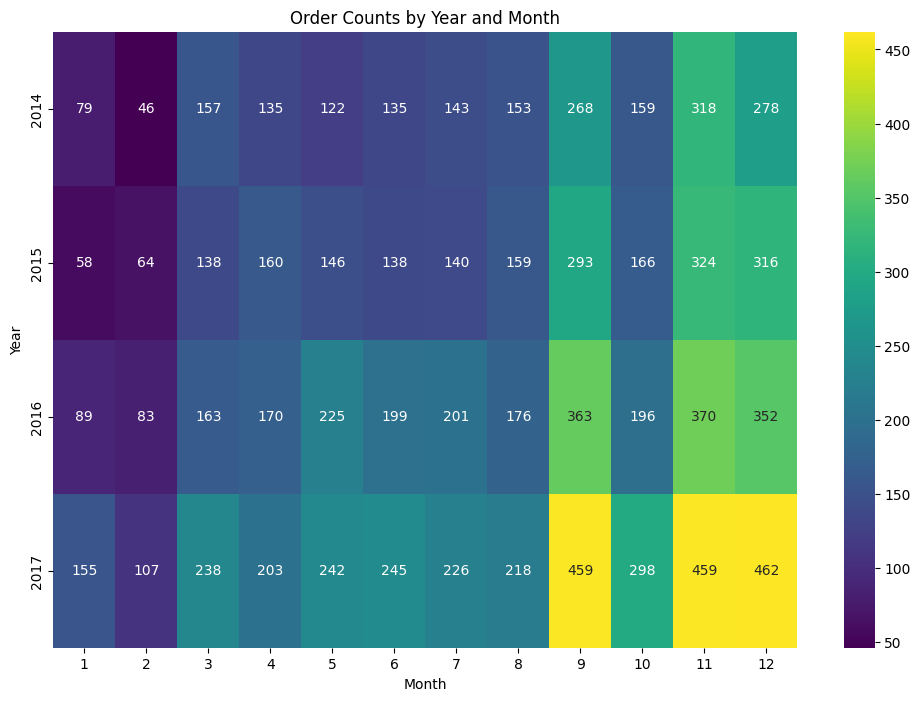

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
orders_by_month_year = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month]).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(orders_by_month_year, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Order Counts by Year and Month')
plt.show()

* The last four months of the year (September to December) are consistently the busiest period.
* Consistent year over-year growth


In [10]:
#now let's see if there are missing values
missing = df.isnull().sum()
print(missing)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


* There is no missing value.

In [11]:
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


* The maximum sale is very high ($22,638),  compared to average $229, which strongly indicates the presence of outliers or a few very large orders.
* The minimum profit is highly negative ($-6,599). This is showing that some sales are extremely unprofitable.

In [12]:
#columns has unique values with their frequencies
categorical_cols = ['Segment', 'Category', 'Sub-Category', 'Region', 'State', 'Ship Mode']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col} :-")
        print(f"Unique values: {df[col].nunique()}")
        print(df[col].value_counts())


Segment :-
Unique values: 3
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Category :-
Unique values: 3
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Sub-Category :-
Unique values: 17
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

Region :-
Unique values: 4
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

State :-
Unique values: 49
State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois              

* Office Supplies is the most sold category by volume.
* Binders and Paper are the most frequently sold individual product.

In [13]:
df['Ship Date']

,Ship Date
0,11/11/2016
1,11/11/2016
2,6/16/2016
3,10/18/2015
4,10/18/2015
...,...
9989,1/23/2014
9990,3/3/2017
9991,3/3/2017
9992,3/3/2017


*ship date is not in datetime.

In [14]:
df['Order Date']

,Order Date
0,2016-11-08
1,2016-11-08
2,2016-06-12
3,2015-10-11
4,2015-10-11
...,...
9989,2014-01-21
9990,2017-02-26
9991,2017-02-26
9992,2017-02-26


* Since Order date is in datetime object there is no need for any conversion







# **Network Analysis of Product Relationships**

*Gonna see which products are frequently bought together.

In [15]:
#preparing data for network analysis
#grouping by order id to get all product names in each order
order_products = df.groupby('Order ID')['Product Name'].apply(list).reset_index()

In [16]:
# filtering out orders with only one product as they don't form pairs
order_products = order_products[order_products['Product Name'].apply(len) > 1]

In [17]:
from itertools import combinations

In [18]:
# Create edges (pairs of products) for each order using itertools.combinations
edges = []
for products_list in order_products['Product Name']:
    # Sorting products in the list to ensure consistent pair order (for example-('A', 'B') is same as ('B', 'A'))
    sorted_products = sorted(products_list)
    for pair in combinations(sorted_products, 2):
        edges.append(pair)

In [19]:
# now let's count the frequency of each product pair
edge_counts = pd.Series(edges).value_counts().reset_index()
edge_counts.columns = ['Product Pair', 'Frequency']

In [20]:
# Displaying the top most frequent product pairs for network visualization
top_n_pairs = 25
most_frequent_pairs = edge_counts.head(25)
print(most_frequent_pairs)

                                         Product Pair  Frequency
0   (Logitech VX Revolution Cordless Laser Mouse f...          2
1                             (Xerox 1894, Xerox 225)          2
2   (Acco Perma 4000 Stacking Storage Drawers, Can...          2
3            (Avery 505, OIC #2 Pencils, Medium Soft)          2
4   (Carina Double Wide Media Storage Towers in Na...          2
5   (GBC Plastic Binding Combs, Hon Valutask Swive...          2
6               (KI Adjustable-Height Table, Staples)          2
7   (Belkin Premiere Surge Master II 8-outlet surg...          2
8   (GBC Recycled VeloBinder Covers, Wilson Jones ...          2
9   (GBC VeloBinder Manual Binding System, Inserta...          2
10  (Acco Hot Clips Clips to Go, Flat Face Poster ...          2
11  (Memorex Micro Travel Drive 16 GB, Wirebound F...          2
12  (Memorex Micro Travel Drive 16 GB, Staple-base...          2
13  (GBC Standard Therm-A-Bind Covers, Google Nexu...          2
14  (Anker 36W 4-Port USB

Observation - so there are 24 product pairs exists.

In [21]:
import networkx as nx

In [22]:
#building the network graph
G = nx.Graph() #this will create an empty undirected graph

In [23]:
#adding nodes and edges, here nodes are individual products and edges are co-purchase relationship
for index, row in most_frequent_pairs.iterrows():
    product1, product2 = row['Product Pair']
    frequency = row['Frequency']
    G.add_edge(product1, product2, weight = frequency)

# Visualization of the Network Graph

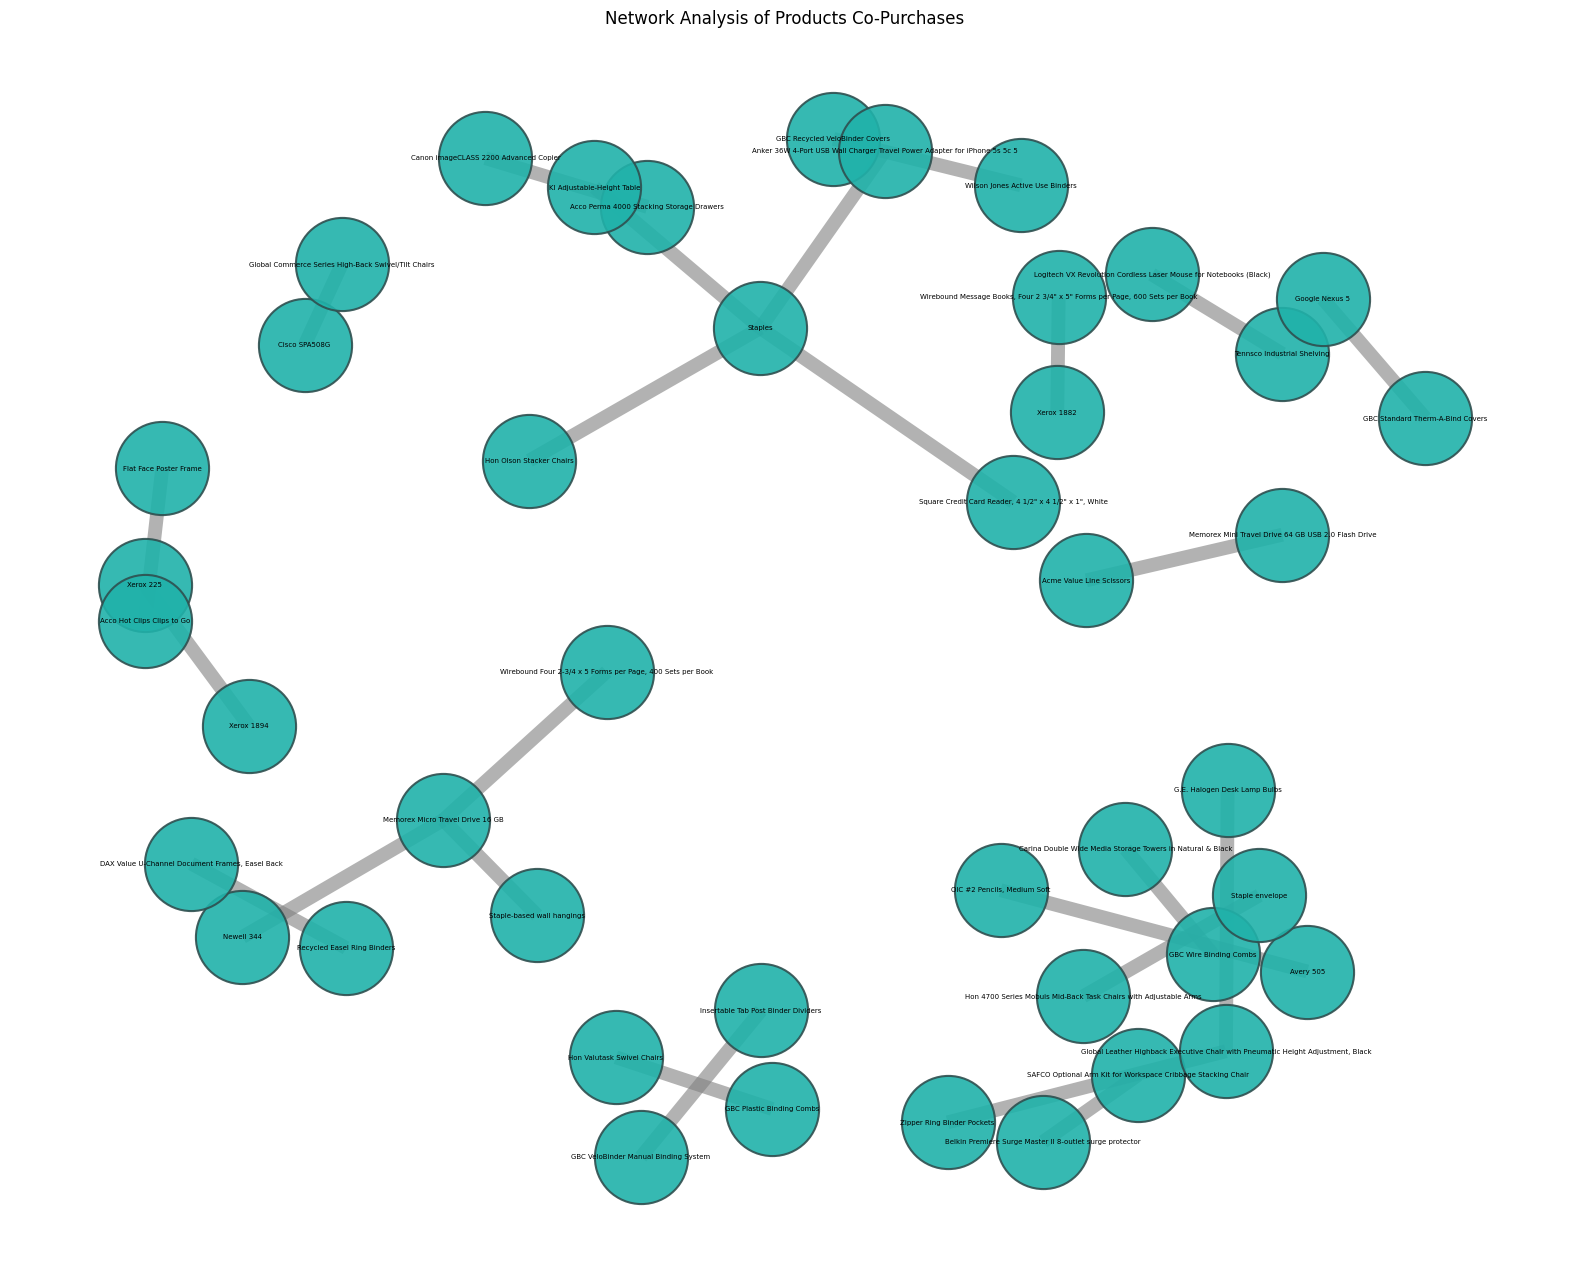

In [24]:
plt.figure(figsize = (20,16)) # I have increased figure size for better visualization
pos = nx.spring_layout(G, k = 0.9, iterations = 70, seed = 42)
# nodes (products)
nx.draw_networkx_nodes(G, pos, node_size=4500, node_color='lightseagreen', alpha=0.9, linewidths=1.5, edgecolors='darkslategray')
# edges(co-purchase links)
max_freq = most_frequent_pairs['Frequency'].max()
edge_widths = [d['weight'] / max_freq * 10 for u, v, d in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_widths, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=5, font_color='black')
plt.title(f"Network Analysis of Products Co-Purchases")
plt.axis('off')
plt.show()


* nodes that are very close together are highly connected to each other.
In the spring_layout algorithm's simulation, the "springs" (representing edges/connections) between these nodes are very strong because the products they represent are very frequently co-purchased. These strong attractive forces pull them into tight clusters.These are natural product groupings or bundles that customers consistently buy together.

* This technique leverages graph theory to visually represent product co-purchase patterns. Instead of just showing lists of frequently bought items, it constructs a network where each 'node' is a product and a connection(edge) signifies co-purchase within an order. The thickness of the edge directly indicates the frequency and strength of this relationship.

# **Time-Series Clustering of Customer Behavior**

In [25]:
#here my goal is to identify distinct customer segments based on their monthly purchasing patterns over time.
#now i know that order date is a datetime object
df['Order Month'] = df['Order Date'].dt.to_period('M')
#now i'm grouping the customer id and order month to get monthly sales for each customer
customer_monthly_sales = df.groupby(['Customer ID', 'Order Month'])['Sales'].sum().unstack(fill_value=0)
all_months = pd.period_range(start = df['Order Month'].min(), end = df['Order Month'].max(), freq = 'M') #ensuring all customers have time series of same length , M is for monthly frequency
customer_monthly_sales = customer_monthly_sales.reindex(columns=all_months, fill_value=0)

In [26]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #standard scaler ensures mean 0 and standard deviation 1.
customer_monthly_sales_scaled = scaler.fit_transform(customer_monthly_sales)
customer_monthly_sales_scaled = pd.DataFrame(customer_monthly_sales_scaled,index = customer_monthly_sales.index, columns=customer_monthly_sales.columns)

In [27]:
print(customer_monthly_sales_scaled.iloc[:5, :5])

              2014-01   2014-02   2014-03   2014-04   2014-05
Customer ID                                                  
AA-10315    -0.093511 -0.088528  0.749681 -0.158805 -0.154140
AA-10375    -0.093511 -0.088528 -0.080218 -0.085280 -0.154140
AA-10480    -0.093511 -0.088528 -0.080218 -0.158805 -0.012205
AA-10645    -0.093511 -0.088528 -0.080218 -0.158805 -0.154140
AB-10015    -0.093511  0.107547  0.273413 -0.158805 -0.154140


* negative values are indicating that the customer's sales for a given month is less than the average sakes for that month across all customers.

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
#clustering
n = 5
cluster = AgglomerativeClustering(n_clusters=n)
#customer_monthly_sales_scaled.columns = customer_monthly_sales_scaled.columns.astype(str)
customer_monthly_sales['Cluster'] = cluster.fit_predict(customer_monthly_sales_scaled.values)

In [30]:
customer_monthly_sales['Cluster'].value_counts()

,count
Cluster,
1,765
3,13
4,11
0,3
2,1


In [31]:
cluster_profiles = customer_monthly_sales.groupby('Cluster').mean()

In [32]:
cluster_profiles.columns

Index([2014-01, 2014-02, 2014-03, 2014-04, 2014-05, 2014-06, 2014-07, 2014-08,
       2014-09, 2014-10, 2014-11, 2014-12, 2015-01, 2015-02, 2015-03, 2015-04,
       2015-05, 2015-06, 2015-07, 2015-08, 2015-09, 2015-10, 2015-11, 2015-12,
       2016-01, 2016-02, 2016-03, 2016-04, 2016-05, 2016-06, 2016-07, 2016-08,
       2016-09, 2016-10, 2016-11, 2016-12, 2017-01, 2017-02, 2017-03, 2017-04,
       2017-05, 2017-06, 2017-07, 2017-08, 2017-09, 2017-10, 2017-11, 2017-12],
      dtype='object')

In [33]:
cluster_profiles.head()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1458.293333,0.000000,0.000000,3.194667,0.000000,0.000000,0.000000,0.000000,70.043333,0.000000,...,762.725333,0.000000,0.000000,181.380000,0.000000,1.984000,0.000000,0.000000,117.819333,73.865333
1,12.891523,5.738986,40.908043,35.482616,17.801468,43.775631,31.459324,33.198829,77.065601,40.732775,...,51.154493,46.794936,56.763066,68.237043,57.006651,82.401244,113.968431,100.863432,147.214027,106.003485
2,0.000000,0.000000,23661.228000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,526.450000,0.000000,0.000000,7.968000,0.000000,0.000000
3,0.000000,9.966769,1.196308,64.552615,0.000000,85.136154,745.692769,28.872308,1739.387385,0.000000,...,23.069231,42.170769,5.396000,6.443077,63.236308,0.000000,0.000000,46.802308,126.019385,4.843077
4,0.000000,0.000000,65.416000,27.488727,911.833091,0.000000,16.909455,194.274909,0.000000,26.620000,...,1559.190000,15.926364,69.746945,13.862545,27.800545,7.089455,61.891091,0.000000,348.853091,222.917909


In [34]:
plt.figure(figsize=(18,10))
#transposing the dataframe so that months are on the x axis and each column represent a cluster's average sales
cluster_profiles_T = cluster_profiles.T

<Figure size 1800x1000 with 0 Axes>

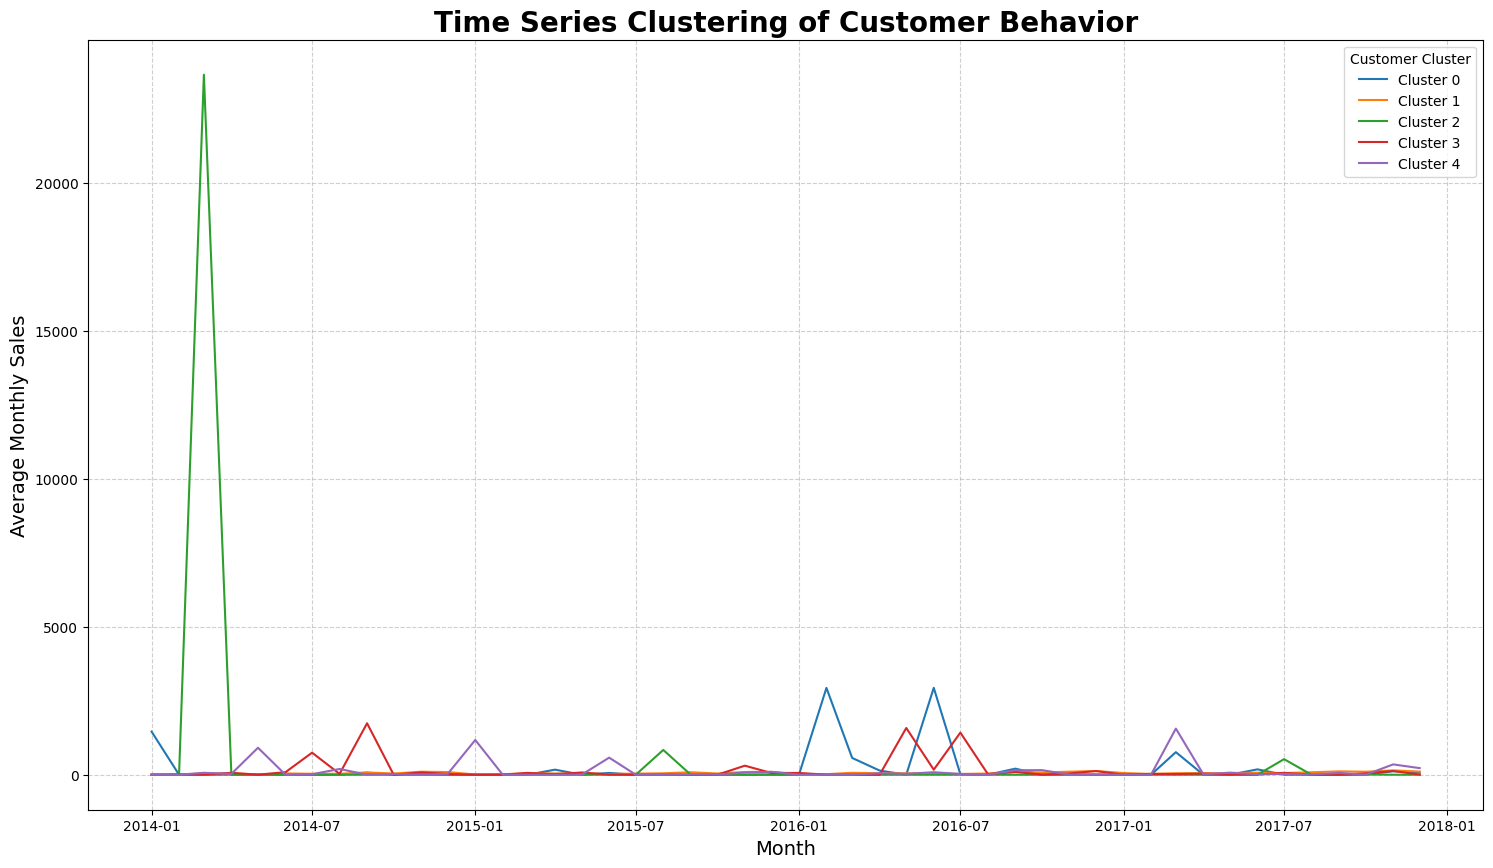

In [35]:
# Plot each cluster's average monthly sales over time
plt.figure(figsize=(18, 10))
for cluster_id in cluster_profiles_T.columns:
    x_values = pd.to_datetime(cluster_profiles_T.index.astype(str))
    y_values = cluster_profiles_T[cluster_id]
    plt.plot(x_values, y_values, label=f'Cluster {cluster_id}')

plt.title('Time Series Clustering of Customer Behavior', fontsize=20, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Monthly Sales', fontsize=14)
plt.legend(title='Customer Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Geospatial Analysis

* now creating a choropleth map of the United States to visualize sales and profitability by state. This is far more impactful than a simple bar chart, as it instantly reveals regional strengths, weaknesses, and potential market opportunities.

In [36]:
import plotly.express as px
#let's prepare data by states
df['State'] = df['State'].str.strip()#removing leading or trailing whitespaces from state names
state_data = df.groupby('State').agg(Total_sales = ('Sales', 'sum'), Total_profit = ('Profit', 'sum'), Customer_Count = ('Customer ID', 'nunique')).reset_index()
#profit  ratio
state_data['Profit_Ratio'] = (state_data['Total_profit'] / state_data['Total_sales'])*100
state_data.head()

,State,Total_sales,Total_profit,Customer_Count,Profit_Ratio
0,Alabama,19510.6400,5786.8253,34,29.659844
1,Arizona,35282.0010,-3427.9246,100,-9.715789
2,Arkansas,11678.1300,4008.6871,27,34.326447
3,California,457687.6315,76381.3871,577,16.688541
4,Colorado,32108.1180,-6527.8579,75,-20.330864


In [37]:
df['State']

,State
0,Kentucky
1,Kentucky
2,California
3,Florida
4,Florida
...,...
9989,Florida
9990,California
9991,California
9992,California


In [38]:
# #now creating the interactive map and coloring the states based on their total sales
# fig = px.choropleth(state_data,
#                     locations = 'State',
#                     locationmode = 'USA-states',
#                     color = 'Total_sales',
#                     scope = 'usa',
#                     hover_name='State',
#                     hover_data={'Total_profit': ':.2f', 'Profit_Ratio': ':.2f', 'Customer_Count': True },
#                     color_continuous_scale="Viridis",
#                     title="Geospatial Analysis: Total Sales & Profitability by State" )
# fig.show()

In [39]:
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           49 non-null     object 
 1   Total_sales     49 non-null     float64
 2   Total_profit    49 non-null     float64
 3   Customer_Count  49 non-null     int64  
 4   Profit_Ratio    49 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.0+ KB


# Recency, Frequency, and Monetary Calculation

* recency is how recently a customer has made a purchase. Low recency value(higher recency score) shows recent purchase.

In [40]:
# snapshot date for recency calculation (one day after the last order)
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
rfm_data = df.groupby('Customer ID').agg({'Order Date': lambda date: (snapshot_date - date.max()).days,'Order ID': 'nunique', 'Sales': 'sum'})
rfm_data.rename(columns={'Order Date': 'Recency','Order ID': 'Frequency','Sales': 'MonetaryValue'}, inplace=True)
#Lower Recency is better, Higher Frequency and Monetary are better.
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=r_labels, duplicates='drop').astype(int)
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 5, labels=f_labels, duplicates='drop').astype(int)
rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'], 5, labels=m_labels, duplicates='drop').astype(int)
#using the weighted formula: 50% Recency, 25% Frequency, 25% Monetary
rfm_data['Customer_Health_Score'] = (0.5 * rfm_data['R_Score']) + (0.25 * rfm_data['F_Score']) + (0.25 * rfm_data['M_Score'])
# Normalize the score to a 0-100
max_possible_score = (0.5*5) + (0.25*5) + (0.25*5) # Max score is 5
min_possible_score = (0.5*1) + (0.25*1) + (0.25*1) # Min score is 1
rfm_data['Customer_Health_Score'] = ((rfm_data['Customer_Health_Score'] - min_possible_score) / (max_possible_score - min_possible_score)) * 100
#Display the top customers by health score
print(rfm_data.sort_values('Customer_Health_Score', ascending=False).head())

             Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
Customer ID                                                                 
AH-10210           7          9       4805.344        5        5        5   
SM-20950          26         12       5563.392        5        5        5   
SE-20110          10         11      12209.438        5        5        5   
TP-21130           9          9       4454.056        5        5        5   
AI-10855          14         10       4375.786        5        5        5   

             Customer_Health_Score  
Customer ID                         
AH-10210                     100.0  
SM-20950                     100.0  
SE-20110                     100.0  
TP-21130                     100.0  
AI-10855                     100.0  


In [41]:
#Aggregate data by product
product_data = df.groupby('Product Name').agg(Total_Sales=('Sales', 'sum'),Total_Profit=('Profit', 'sum')).reset_index()
# Filter out products with zero or negative sales to avoid division by zero
product_data = product_data[product_data['Total_Sales'] > 0]
product_data['Profit_Margin'] = (product_data['Total_Profit'] / product_data['Total_Sales']) * 100
# Rank products by sales and profit margin
product_data['Sales_Rank_Score'] = product_data['Total_Sales'].rank(pct=True)
product_data['Margin_Rank_Score'] = product_data['Profit_Margin'].rank(pct=True)
# We give equal weight to sales volume and profitability
product_data['Product_Velocity_Index'] = (product_data['Sales_Rank_Score'] + product_data['Margin_Rank_Score']) * 50 # Scale to 100
# Display the top products by velocity index
print(product_data.sort_values('Product_Velocity_Index', ascending=False).head())

                                           Product Name  Total_Sales  \
165                   Ativa V4110MDD Micro-Cut Shredder      7699.89   
1840                  Zebra ZM400 Thermal Label Printer      6965.70   
405   Canon imageCLASS MF7460 Monochrome Digital Las...      3991.98   
812   Hewlett-Packard Desktjet 6988DT Refurbished Pr...      3404.50   
807   Hewlett-Packard Deskjet 3050a All-in-One Color...      3040.00   

      Total_Profit  Profit_Margin  Sales_Rank_Score  Margin_Rank_Score  \
165      3772.9461           49.0          0.973514           0.994595   
1840     3343.5360           48.0          0.968649           0.981351   
405      1995.9900           50.0          0.918919           0.998649   
812      1668.2050           49.0          0.902162           0.994595   
807      1459.2000           48.0          0.891351           0.986486   

      Product_Velocity_Index  
165                98.405405  
1840               97.500000  
405                95.878378 

* now calculating the number of unique customers in each state to identify regions with a strong customer base.

/tmp/ipython-input-1519333036.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unique_Customer_Count', y='State', data=market_penetration, palette='coolwarm')


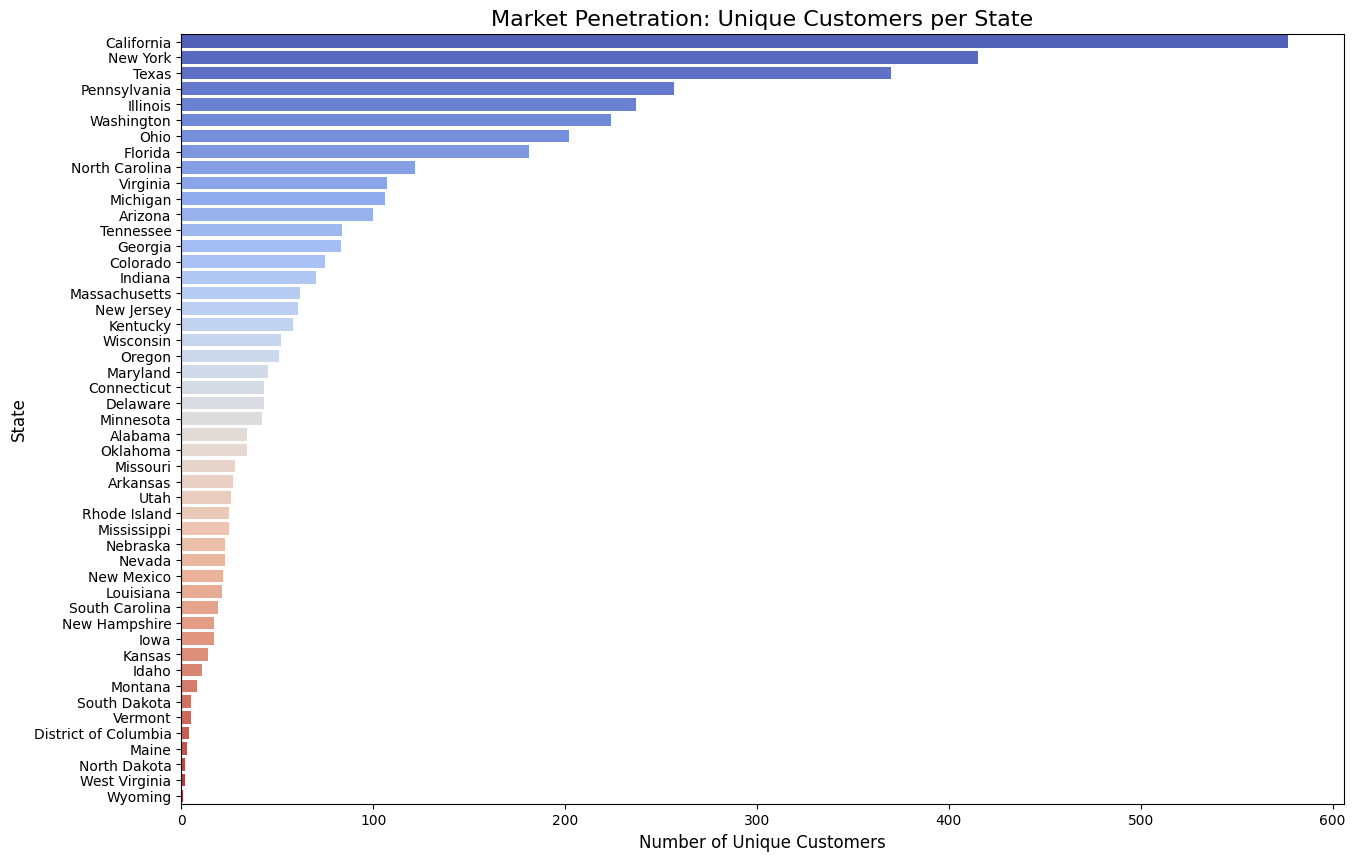

--- Top 5 States by Customer Count ---
           State  Unique_Customer_Count
3     California                    577
30      New York                    415
41         Texas                    370
36  Pennsylvania                    257
11      Illinois                    237

--- Bottom 5 States by Customer Count ---
                   State  Unique_Customer_Count
7   District of Columbia                      4
17                 Maine                      3
32          North Dakota                      2
46         West Virginia                      2
48               Wyoming                      1


In [42]:
#Calculate unique customers per state
market_penetration = df.groupby('State')['Customer ID'].nunique().reset_index()
market_penetration.rename(columns={'Customer ID': 'Unique_Customer_Count'}, inplace=True)
market_penetration = market_penetration.sort_values('Unique_Customer_Count', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='Unique_Customer_Count', y='State', data=market_penetration, palette='coolwarm')
plt.title('Market Penetration: Unique Customers per State', fontsize=16)
plt.xlabel('Number of Unique Customers', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()
print("--- Top 5 States by Customer Count ---")
print(market_penetration.head())
print("\n--- Bottom 5 States by Customer Count ---")
print(market_penetration.tail())

In [43]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
# Defining promised shipping times
promised_times = {'Same Day': 0,'First Class': 1,'Second Class': 3,'Standard Class': 5}
df['Promised_Time'] = df['Ship Mode'].map(promised_times)
# Calculating actual shipping time
df['Actual_Ship_Time'] = (df['Ship Date'] - df['Order Date']).dt.days
# checking if each order was on time -
df['Is_On_Time'] = df['Actual_Ship_Time'] <= df['Promised_Time']

on_time_percentage = df['Is_On_Time'].mean() * 100
print(f"--- Operational Excellence Score ---")
print(f"On-Time Shipping Percentage: {on_time_percentage:.2f}%")

--- Operational Excellence Score ---
On-Time Shipping Percentage: 61.56%


In [44]:
# Aggregate data by Category
category_data = df.groupby('Category').agg( Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum')).reset_index()

# Calculate Market Share and Profit Margin
total_company_sales = category_data['Total_Sales'].sum()
category_data['Market_Share'] = (category_data['Total_Sales'] / total_company_sales)
category_data['Profit_Margin'] = (category_data['Total_Profit'] / category_data['Total_Sales'])
category_data['Market_Share_Score'] = category_data['Market_Share'].rank(pct=True)
category_data['Profit_Margin_Score'] = category_data['Profit_Margin'].rank(pct=True)
category_data['Competitive_Advantage_Index'] = (category_data['Market_Share_Score'] + category_data['Profit_Margin_Score']) * 50
print(category_data.sort_values('Competitive_Advantage_Index', ascending=False))

          Category  Total_Sales  Total_Profit  Market_Share  Profit_Margin  \
2       Technology  836154.0330   145454.9481      0.363988       0.173957   
0        Furniture  741999.7953    18451.2728      0.323002       0.024867   
1  Office Supplies  719047.0320   122490.8008      0.313010       0.170352   

   Market_Share_Score  Profit_Margin_Score  Competitive_Advantage_Index  
2            1.000000             1.000000                        100.0  
0            0.666667             0.333333                         50.0  
1            0.333333             0.666667                         50.0  


# **Survival Analysis For Customer Churn**

In [45]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=3ac052c54c431d7c01baa9cd3c5cf64eee0f91f4b6d22a7956228fa3b3f37836
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [46]:
from lifelines import CoxPHFitter

In [47]:
#Feature Engineering
customer_features = df.groupby('Customer ID').agg(
    duration=('Order Date', lambda date: (date.max() - date.min()).days),
    Total_Sales=('Sales', 'sum'),
    Avg_Discount=('Discount', 'mean'),
    Total_Orders=('Order ID', 'nunique')
).reset_index()

In [48]:
#now let's define churn event by a common business rule: a customer is considered "churned" if their last purchase was more than 6 months ago.
observation_end_date = df['Order Date'].max()
churn_cutoff_date = observation_end_date - pd.DateOffset(months=6)
# the last purchase date for each customer
last_purchase_dates = df.groupby('Customer ID')['Order Date'].max().reset_index()
last_purchase_dates.rename(columns={'Order Date': 'Last_Purchase_Date'}, inplace=True)
customer_features = pd.merge(customer_features, last_purchase_dates, on='Customer ID')
# The 'churned' event is 1 if their last purchase was before the cutoff, else 0.
customer_features['churned'] = (customer_features['Last_Purchase_Date'] < churn_cutoff_date).astype(int)

In [49]:
# Cox Proportional Hazards Model - This model will tell us the effect of each feature on the likelihood of churn.
cph = CoxPHFitter()
cph.fit(customer_features[['duration', 'churned', 'Total_Sales', 'Avg_Discount', 'Total_Orders']], duration_col='duration', event_col='churned')

<lifelines.CoxPHFitter: fitted with 793 total observations, 597 right-censored observations>

In [50]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 793 total observations, 597 right-censored observations>
             duration col = 'duration'
                event col = 'churned'
      baseline estimation = breslow
   number of observations = 793
number of events observed = 196
   partial log-likelihood = -1156.14
         time fit was run = 2025-09-05 09:24:33 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
Total_Sales   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Avg_Discount  0.07      1.07      0.72           -1.34            1.48                0.26                4.41
Total_Orders -0.47      0.63      0.04           -0.55           -0.39                0.58                0.68

              cmp to      z      p  -log2(p)
covariate                                   
Total_Sales     0.00   0.14   0.89      0.17
Avg_Discount    0.00   0.10   0.92      0.12
Total_Orders    0.00 -11.31 <0.005     96.07
---
Concordance = 0.77
Partial AIC = 2318.29
log-likelihood ratio test = 169.17 on 3 df
-log2(p) of ll-ratio test = 118.65

# Concept -
exp(coef)-(Hazard Ratio):
1. If this is < 1, the factor reduces the risk of churn (it's a good thing).
2. If this is > 1, the factor increases the risk of churn (it's a bad thing).

p (p-value):

1. If this is < 0.05, the factor's effect is statistically significant and real.

2. If this is > 0.05, the effect is likely due to random chance and not significant.

Total_Orders: The exp(coef) is 0.63 (which is less than 1) and the p-value is <0.005.
Insight: This is our most important finding. It means that for every additional order a customer places, their risk of churning decreases by about 37% (1.00 - 0.63 = 0.37). This is a highly significant factor that drives customer retention.

Avg_Discount & Total_Sales: For both of these factors, the p-value is very high (0.92 and 0.89).
Insight: This tells us that, surprisingly, the total amount a customer spends and the average discount they receive have no statistically significant effect on whether they churn or not.

<Axes: xlabel='log(HR) (95% CI)'>

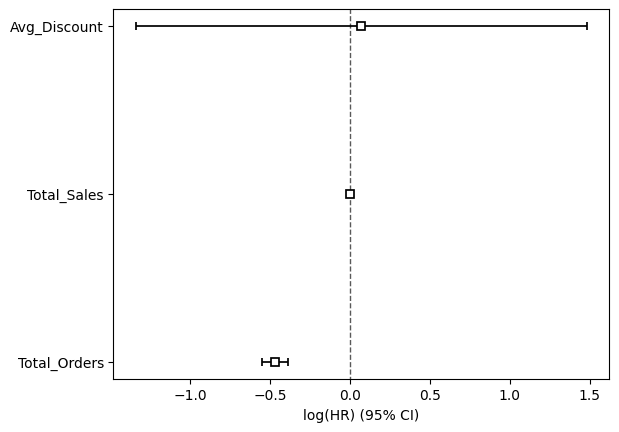

In [51]:
cph.plot()

* The vertical dashed line represents "no effect."
* Factors to the left of the line reduce churn risk.
* Factors to the right increase churn risk.

# **Bayesian A/B Testing for Discount Effectiveness**

Now let's answer the question - "How likely is it that offering a discount is better than offering no discount?"

In [52]:
import pymc as pm
import arviz as az

In [53]:
data = df[df['Quantity'] < 10].copy() #filtering data for simplicity

In [54]:
# Group A (Control)
control_group = data[data['Discount'] == 0]['Quantity']
# Group B (Treatment)
treatment_group = data[data['Discount'] > 0]['Quantity']

In [55]:
print(len(control_group))#no discount
print(len(treatment_group))#with discount

4718
5106


In [56]:
#now let's define bayesian model
with pm.Model() as model:
    avg_control = pm.Gamma('avg_control', alpha=1.0, beta=1.0)
    avg_treatment = pm.Gamma('avg_treatment', alpha=1.0, beta=1.0)
    control_likelihood = pm.Poisson('control_likelihood', mu=avg_control, observed=control_group)
    treatment_likelihood = pm.Poisson('treatment_likelihood', mu=avg_treatment, observed=treatment_group)
    diff_of_means = pm.Deterministic('diff_of_means', avg_treatment - avg_control)
    treatment_is_better = pm.Deterministic('treatment_is_better', diff_of_means > 0)
#running the simulation
with model:
    trace = pm.sample(2000, tune=1000, cores=1)


Output()

array([<Axes: title={'center': 'avg_control'}>,
       <Axes: title={'center': 'avg_treatment'}>,
       <Axes: title={'center': 'diff_of_means'}>], dtype=object)

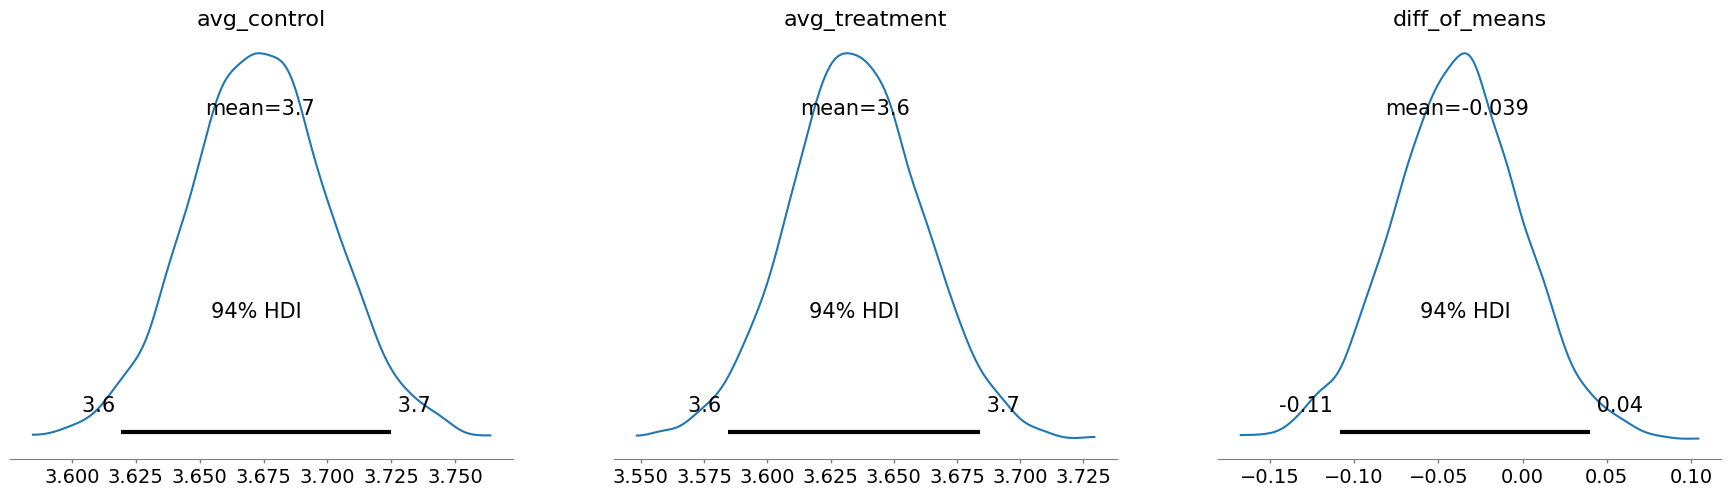

In [57]:
#let's analyse and plot
az.plot_posterior(trace, var_names=['avg_control', 'avg_treatment', 'diff_of_means'])



* This analysis strongly indicates that offering a discount is not an effective strategy for increasing the number of items customers purchase per transaction.

# Market Share Velocity Calculation

The goal is to measure the rate of change of market share for our main product categories. A simple market share number tells you where you are now, but velocity tells you if you are gaining or losing ground and how quickly. This is a leading indicator of future performance.

In [58]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearQuarter'] = df['Order Date'].dt.to_period('Q').astype(str)
# total sales per quarter
total_quarterly_sales = df.groupby('YearQuarter')['Sales'].sum().reset_index()
total_quarterly_sales.rename(columns={'Sales': 'Total_Quarterly_Sales'}, inplace=True)
# sales per category per quarter
category_quarterly_sales = df.groupby(['YearQuarter', 'Category'])['Sales'].sum().reset_index()
#calculate market share
market_data = pd.merge(category_quarterly_sales, total_quarterly_sales, on='YearQuarter')
market_data['Market_Share'] = (market_data['Sales'] / market_data['Total_Quarterly_Sales']) * 100
# Calculate Market Share Velocity
market_data.sort_values(by=['Category', 'YearQuarter'], inplace=True)
# Calculate the change from the previous quarter
market_data['Market_Share_Velocity'] = market_data.groupby('Category')['Market_Share'].pct_change() * 100
# Show the velocity for the last few quarters for each category
print("--- Market Share Velocity (% Change from Previous Quarter) ---")
print(market_data.dropna().groupby('Category').tail(3))
avg_velocity = market_data.groupby('Category')['Market_Share_Velocity'].mean().reset_index()
print("\n--- Average Quarterly Market Share Velocity ---")
print(avg_velocity)

--- Market Share Velocity (% Change from Previous Quarter) ---
   YearQuarter         Category       Sales  Total_Quarterly_Sales  \
39      2017Q2        Furniture   45032.103             133764.372   
42      2017Q3        Furniture   56283.102             196251.956   
45      2017Q4        Furniture   90348.250             280054.067   
40      2017Q2  Office Supplies   45721.194             133764.372   
43      2017Q3  Office Supplies   72197.163             196251.956   
46      2017Q4  Office Supplies   84946.471             280054.067   
41      2017Q2       Technology   43011.075             133764.372   
44      2017Q3       Technology   67771.691             196251.956   
47      2017Q4       Technology  104759.346             280054.067   

    Market_Share  Market_Share_Velocity  
39     33.665245              74.748538  
42     28.679002             -14.811248  
45     32.261003              12.489977  
40     34.180397              -2.639099  
43     36.787997          

* The first thing we notice is how much the velocity fluctuates. For example, Furniture's market share grew by a massive 74.7% in Q2 but then fell by 14.8% in Q3. This indicates that market share is not stable and is highly dependent on sales within a specific quarter.
*  In the most recent quarter (2017Q4), both Furniture (+12.5%) and Technology (+8.3%) saw healthy growth in their market share, while Office Supplies (-17.5%) saw a significant decline.
* With an average quarterly growth of 5.7%, the Office Supplies category is consistently expanding its share of the business over the long term.The Furniture category is also growing steadily, with an average quarterly velocity of 3.8%.The Technology category has an average velocity of only 0.2%. This is a critical insight. While we know from previous analysis that Technology is the most profitable and has the highest market share, this result tells us that its dominant position is stable but not growing.

# **Product Portfolio Health Score**

In [59]:
# Aggregate data by product
product_health_data = df.groupby('Product Name').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum'), Avg_Discount=('Discount', 'mean')).reset_index()
# Filter out products with zero or negative sales to avoid division by zero
product_health_data = product_health_data[product_health_data['Total_Sales'] > 0]
product_health_data['Profit_Margin'] = product_health_data['Total_Profit'] / product_health_data['Total_Sales']
product_health_data['Sales_Score'] = product_health_data['Total_Sales'].rank(pct=True) # Sales Score: Higher sales = higher score
# Profit Score: Higher profit margin = higher score
product_health_data['Profit_Score'] = product_health_data['Profit_Margin'].rank(pct=True)
# Discount Score: Lower discount = higher score
product_health_data['Discount_Score'] = 1 - product_health_data['Avg_Discount'].rank(pct=True)

# Final Health Score
# We give equal weight to each of the three components
product_health_data['Health_Score'] = (product_health_data['Sales_Score'] + product_health_data['Profit_Score'] + product_health_data['Discount_Score']) / 3 * 100 # Scale to 100

print("--- Top 10 Healthiest Products ---")
print(product_health_data.sort_values('Health_Score', ascending=False).head(10)[['Product Name', 'Health_Score', 'Total_Sales', 'Profit_Margin', 'Avg_Discount']])

print("\n--- Bottom 10 Unhealthiest Products ---")
print(product_health_data.sort_values('Health_Score', ascending=True).head(10)[['Product Name', 'Health_Score', 'Total_Sales', 'Profit_Margin', 'Avg_Discount']])


--- Top 10 Healthiest Products ---
                                           Product Name  Health_Score  \
165                   Ativa V4110MDD Micro-Cut Shredder     97.189189   
1840                  Zebra ZM400 Thermal Label Printer     96.585586   
405   Canon imageCLASS MF7460 Monochrome Digital Las...     95.504505   
812   Hewlett-Packard Desktjet 6988DT Refurbished Pr...     94.810811   
807   Hewlett-Packard Deskjet 3050a All-in-One Color...     94.180180   
1062                     Maxell iVDR EX 500GB Cartridge     89.882883   
1028  Logitech Z-906 Speaker sys - home theater - 5....     89.783784   
441                      Cisco SPA525G2 5-Line IP Phone     89.468468   
1329  Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...     89.108108   
1702                                         Xerox 1917     88.693694   

      Total_Sales  Profit_Margin  Avg_Discount  
165      7699.890       0.490000      0.000000  
1840     6965.700       0.480000      0.000000  
405      3991.

here health score was evaluated by giving equal weightage to sales volume, profit margin, and discount level.

# **Revenue Quality Score**

Goal is assess the health and sustainability of the revenue generated by each product category.

In [60]:
# A sale is 'High Quality' if it was profitable AND had no discount.
df['is_high_quality'] = (df['Profit'] > 0) & (df['Discount'] == 0)
df['high_quality_revenue'] = df.apply(lambda row: row['Sales'] if row['is_high_quality'] else 0, axis=1)
# Calculate total sales for each category
total_sales_by_category = df.groupby('Category')['Sales'].sum()
# Calculate the high-quality revenue for each category
high_quality_sales_by_category = df.groupby('Category')['high_quality_revenue'].sum()
revenue_quality_df = pd.DataFrame({'Total_Revenue': total_sales_by_category, 'High_Quality_Revenue': high_quality_sales_by_category})
revenue_quality_df['Revenue_Quality_Score'] = (revenue_quality_df['High_Quality_Revenue'] / revenue_quality_df['Total_Revenue']) * 100

# Display the results ---
print("--- Revenue Quality Score by Category ---")
print(revenue_quality_df.sort_values('Revenue_Quality_Score', ascending=False))


--- Revenue Quality Score by Category ---
                 Total_Revenue  High_Quality_Revenue  Revenue_Quality_Score
Category                                                                   
Office Supplies    719047.0320             434293.96              60.398547
Technology         836154.0330             389517.88              46.584465
Furniture          741999.7953             256025.27              34.504763


result shows Office Supplies is the most sustainable category. The biggest strategic challenge is the Furniture category.

# **Statistical Hypothesis Generation**

# Hypothesis Test 1: Technology vs. Furniture Profit

In [61]:
from scipy.stats import ttest_ind

In [62]:
# Creating two separate samples for the test
# Sample 1: Profit from all sales in the 'Technology' category
tech_profit = df[df['Category'] == 'Technology']['Profit']
# Sample 2: Profit from all sales in the 'Furniture' category
furniture_profit = df[df['Category'] == 'Furniture']['Profit']
# Perform the Independent Samples T-Test
t_statistic, p_value = ttest_ind(tech_profit, furniture_profit, equal_var=False) # equal_var=False because the variances of the two groups might not be equal

print("--- Hypothesis Test: Technology Profit vs. Furniture Profit ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("We reject the null hypothesis. The average profit for Technology is significantly different from Furniture.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant difference in average profit.")


--- Hypothesis Test: Technology Profit vs. Furniture Profit ---
T-statistic: 6.7320
P-value: 0.0000
We reject the null hypothesis. The average profit for Technology is significantly different from Furniture.


T-statistic: 6.7320: This indicates that the average profit for Technology is indeed much higher than the average profit for Furniture.
P-value: 0.0000: p-value this low means that the difference we observed is not due to random chance.

# Hypothesis Test 2: First Class vs. Standard Class Sales

In [63]:
# Sample 1: Sales from all orders with 'First Class' shipping
first_class_sales = df[df['Ship Mode'] == 'First Class']['Sales']
# Sample 2: Sales from all orders with 'Standard Class' shipping
standard_class_sales = df[df['Ship Mode'] == 'Standard Class']['Sales']
t_statistic, p_value = ttest_ind(first_class_sales, standard_class_sales, equal_var=False)

print("--- Hypothesis Test: First Class Sales vs. Standard Class Sales ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. The average sales value for First Class shipping is significantly different from Standard Class.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant difference in average sales value.")

--- Hypothesis Test: First Class Sales vs. Standard Class Sales ---
T-statistic: 0.0504
P-value: 0.9598
We fail to reject the null hypothesis. There is no statistically significant difference in average sales value.


observation - the customers who choose premium 'First Class' shipping do not spend more on average than customers who choose 'Standard Class' shipping.

### Shipping Mode and Sales Value

"Orders shipped via 'First Class' have a significantly higher average sales value than orders shipped via 'Standard Class'."

In [64]:
# Sample 1: Sales from all orders with 'First Class' shipping
first_class_sales = df[df['Ship Mode'] == 'First Class']['Sales']

# Sample 2: Sales from all orders with 'Standard Class' shipping
standard_class_sales = df[df['Ship Mode'] == 'Standard Class']['Sales']

# Perform the Independent Samples T-Test
t_statistic, p_value = ttest_ind(first_class_sales, standard_class_sales, equal_var=False)
print("--- Hypothesis Test: First Class Sales vs. Standard Class Sales ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. The average sales value for First Class shipping is significantly different from Standard Class.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant difference in average sales value.")

--- Hypothesis Test: First Class Sales vs. Standard Class Sales ---
T-statistic: 0.0504
P-value: 0.9598
We fail to reject the null hypothesis. There is no statistically significant difference in average sales value.


# Interactive Sales and Profit Dashboard

In [65]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.3 MB/s eta 0:00:00


In [66]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


# Initialize the Dash App
app = dash.Dash(__name__)

# now defining the App Layout
app.layout = html.Div(children=[
    html.H1(children='Superstore Analytics Dashboard', style={'textAlign': 'center'}),

    html.Div(children='''
        An interactive dashboard to explore Sales and Profit data.
    ''', style={'textAlign': 'center'}),

    # Dropdown menu to select the metric
    dcc.Dropdown(
        id='metric-selector',
        options=[
            {'label': 'Sales', 'value': 'Sales'},
            {'label': 'Profit', 'value': 'Profit'}
        ],
        value='Sales',  # Default value
        style={'width': '50%', 'margin': '20px auto'}
    ),

    # Graph components that will be updated by the callback
    dcc.Graph(id='category-bar-chart'),
    dcc.Graph(id='time-series-chart')
])

# Define the Callback Function(This function connects the dropdown to the graphs)
@app.callback(
    [Output('category-bar-chart', 'figure'),
     Output('time-series-chart', 'figure')],
    [Input('metric-selector', 'value')]
)
def update_graphs(selected_metric):
    # Bar Chart by Category
    bar_fig = px.bar(
        df.groupby('Category')[selected_metric].sum().reset_index(),
        x='Category',
        y=selected_metric,
        title=f'Total {selected_metric} by Product Category'
    )

    # Time Series Chart
    time_series_data = df.groupby(pd.Grouper(key='Order Date', freq='M'))[selected_metric].sum().reset_index()
    line_fig = px.line(
        time_series_data,
        x='Order Date',
        y=selected_metric,
        title=f'Total {selected_metric} Over Time'
    )

    return bar_fig, line_fig

if __name__ == '__main__':
    app.run(debug=True, port=8051)

<IPython.core.display.Javascript object>

In [67]:
import pandas as pd
import plotly.express as px
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Create a 'Month-Year' column for grouping
df['MonthYear'] = df['Order Date'].dt.to_period('M').astype(str)
# Group by month and category to get monthly sales
monthly_sales = df.groupby(['MonthYear', 'Category'])['Sales'].sum().reset_index()
# Sort by date to ensure correct cumulative calculation
monthly_sales.sort_values(by='MonthYear', inplace=True)
# Calculate the cumulative sales for each category
monthly_sales['Cumulative_Sales'] = monthly_sales.groupby('Category')['Sales'].cumsum()
fig = px.bar(
    monthly_sales,
    x='Category',
    y='Cumulative_Sales',
    color='Category',
    animation_frame='MonthYear', # Creates a frame for each month
    animation_group='Category',  # Tracks each category across frames
    range_y=[0, monthly_sales['Cumulative_Sales'].max() * 1.1],
    title="Animated Bar Chart Race: Cumulative Sales by Category",
    labels={'Cumulative_Sales': 'Cumulative Sales', 'Category': 'Product Category'}
)
# Improve the layout and animation speed
fig.update_layout(
    transition={'duration': 200} # Speed of transition between frames in milliseconds
)

fig.show()


/tmp/ipython-input-1226130500.py:49: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Inteteractive product co-purchase network

In [68]:
import plotly.graph_objects as go
most_frequent_pairs = edge_counts.head(30)
G = nx.from_pandas_edgelist(most_frequent_pairs,
                             source='Product Pair',
                             target='Product Pair', # This is a trick to handle tuples in columns
                             edge_attr='Frequency')
G_corrected = nx.Graph()
for index, row in most_frequent_pairs.iterrows():
    product1, product2 = row['Product Pair']
    frequency = row['Frequency']
    G_corrected.add_edge(product1, product2, weight=frequency)

G = G_corrected
# Calculate node positions using a spring layout
pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)
# Create the edge trace
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')
# Create the node trace
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))
# Add node text (product names) and color based on connectivity
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f'{adjacencies[0]}<br># of connections: {len(adjacencies[1])}')

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Create the Figure and Show It
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Interactive Network Graph of Product Co-Purchases',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="An interactive graph showing which products are most frequently bought together.",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


CEO Executive Dashboard

In [69]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df['Order Date'] = pd.to_datetime(df['Order Date'])
df.sort_values('Order Date', inplace=True)
monthly_summary = df.resample('M', on='Order Date').agg(
    Monthly_Sales=('Sales', 'sum'),
    Monthly_Profit=('Profit', 'sum')
).reset_index()
# Calculate cumulative unique customers over time
df['cumulative_customers'] = df['Customer ID'].cumsum().astype(str).rank(method='dense').astype(int)
monthly_customers = df.groupby(pd.Grouper(key='Order Date', freq='M'))['cumulative_customers'].max().reset_index()
# using subplots to arrange the three charts
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"colspan": 2}, None],
           [{}, {}]],
    subplot_titles=("Total Sales Over Time", "Total Profit Over Time", "Cumulative Customer Growth")
)
#Chart 1: Total Sales Over Time
fig.add_trace(
    go.Scatter(x=monthly_summary['Order Date'], y=monthly_summary['Monthly_Sales'], mode='lines+markers', name='Sales'),
    row=1, col=1
)
# Chart 2: Total Profit Over Time
fig.add_trace(
    go.Scatter(x=monthly_summary['Order Date'], y=monthly_summary['Monthly_Profit'], mode='lines+markers', name='Profit'),
    row=2, col=1
)
# Chart 3: Cumulative Customer Growth
fig.add_trace(
    go.Scatter(x=monthly_customers['Order Date'], y=monthly_customers['cumulative_customers'], mode='lines', name='Customers', line=dict(color='green')),
    row=2, col=2
)
#Style and Finalize the Dashboard
fig.update_layout(
    title_text='Key Business Performance Indicators',
    height=600,
    showlegend=False
)

fig.show()


/tmp/ipython-input-2783405845.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-2783405845.py:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [70]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a monthly summary for time-series analysis
monthly_financials = df.resample('M', on='Order Date').agg(
    Monthly_Sales=('Sales', 'sum'),
    Monthly_Profit=('Profit', 'sum')
).reset_index()
# Calculate monthly profit margin
monthly_financials['Profit_Margin'] = (monthly_financials['Monthly_Profit'] / monthly_financials['Monthly_Sales']) * 100
# Create a summary by sub-category
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"colspan": 2}, None],
           [{}, {}]],
    subplot_titles=("Profit Margin Over Time (%)", "Sales vs. Profit Analysis", "Profit by Sub-Category")
)
fig.add_trace(
    go.Scatter(x=monthly_financials['Order Date'], y=monthly_financials['Profit_Margin'], mode='lines', name='Profit Margin'),
    row=1, col=1
)

# Sales vs. Profit
fig.add_trace(
    go.Scatter(x=monthly_financials['Order Date'], y=monthly_financials['Monthly_Sales'], name='Sales', line=dict(color='blue')),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=monthly_financials['Order Date'], y=monthly_financials['Monthly_Profit'], name='Profit', line=dict(color='red')),
    row=2, col=1
)

# Profit by Sub-Category
fig.add_trace(
    go.Bar(x=subcategory_profit['Sub-Category'], y=subcategory_profit['Profit'], name='Sub-Category Profit'),
    row=2, col=2
)


#  Style and Finalize the Dashboard
fig.update_layout(
    title_text='Financial Performance & Profitability Analysis',
    height=700,
    showlegend=True
)
# Make the sub-category labels easier to read
fig.update_xaxes(tickangle=45, row=2, col=2)

fig.show()


/tmp/ipython-input-2550446766.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [71]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['MonthYear'] = df['Order Date'].dt.to_period('M')
# Find the most recent month in the dataset
last_month = df['MonthYear'].max()
previous_month = last_month - 1
# Filter data for the last month
last_month_data = df[df['MonthYear'] == last_month]
# Filter data for the previous month
previous_month_data = df[df['MonthYear'] == previous_month]

last_month_sales = last_month_data['Sales'].sum()
previous_month_sales = previous_month_data['Sales'].sum()
last_month_profit = last_month_data['Profit'].sum()
previous_month_profit = previous_month_data['Profit'].sum()

# Calculate sales growth
sales_growth = ((last_month_sales - previous_month_sales) / previous_month_sales) * 100

# Best and Worst Sub-Category in the Last Month
subcat_performance = last_month_data.groupby('Sub-Category')['Profit'].sum()
best_subcat = subcat_performance.idxmax()
best_subcat_profit = subcat_performance.max()

worst_subcat = subcat_performance.idxmin()
worst_subcat_profit = subcat_performance.min()

# Generate the Natural Language Summary
report = f"""
Report for Month: {last_month}
1.  Overall Performance:
    * Total Sales: ${last_month_sales:,.2f}
    * Total Profit: ${last_month_profit:,.2f}
    * Sales Growth (vs. prior month): {sales_growth:.2f}%

2.  Key Insights for the Month:
    * The best-performing product line was **'{best_subcat}'**, which generated **${best_subcat_profit:,.2f}** in profit.
    * The worst-performing product line was **'{worst_subcat}'**, which lost **${worst_subcat_profit:,.2f}**.
"""

print(report)



Report for Month: 2017-12
1.  Overall Performance:
    * Total Sales: $83,829.32
    * Total Profit: $8,483.35
    * Sales Growth (vs. prior month): -29.23%

2.  Key Insights for the Month:
    * The best-performing product line was **'Copiers'**, which generated **$2,540.96** in profit.
    * The worst-performing product line was **'Binders'**, which lost **$-2,689.62**.



/tmp/ipython-input-2238355711.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkuof7b5s/b0xq2ahe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkuof7b5s/lmxubxt2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80006', 'data', 'file=/tmp/tmpkuof7b5s/b0xq2ahe.json', 'init=/tmp/tmpkuof7b5s/lmxubxt2.json', 'output', 'file=/tmp/tmpkuof7b5s/prophet_modelnejh595p/prophet_model-20250905092955.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:29:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:29:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/u

Prophet Model Performance (MAPE)
Prophet Model MAPE for 2017 Forecast: 19.07%

MAPE indicates the average percentage difference between the forecast and the actual sales.


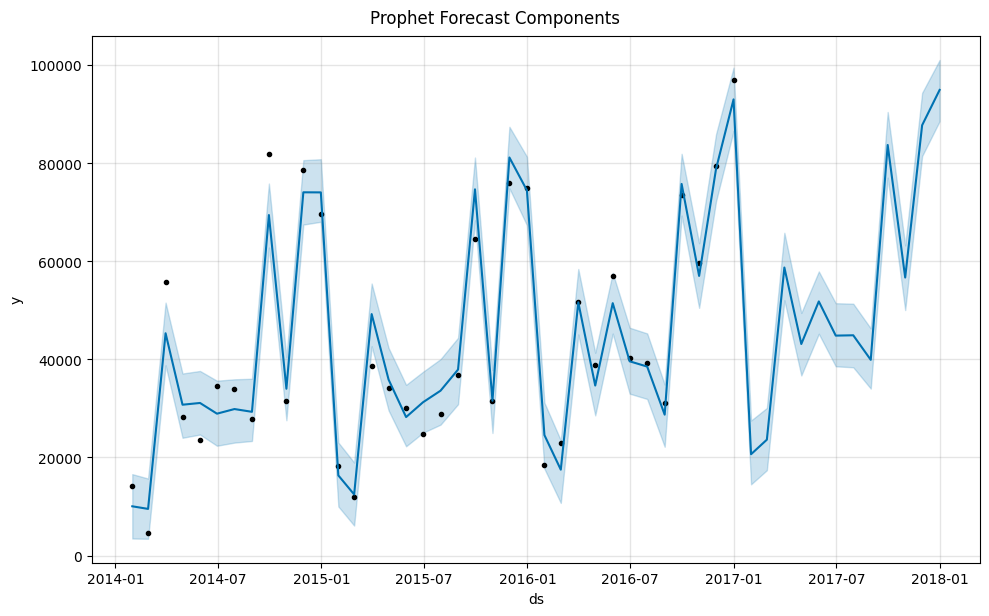

In [73]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
import plotly.graph_objects as go
# Prophet requires the columns to be named 'ds' (datestamp) and 'y' (value).
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum().reset_index()
monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)
# We will train the model on data up to the end of 2016 and test its accuracy on 2017 data.
train = monthly_sales[monthly_sales['ds'] < '2017-01-01']
test = monthly_sales[monthly_sales['ds'] >= '2017-01-01']
# We enable yearly seasonality as we know there are strong seasonal patterns in the data.
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
prophet_model.fit(train)
# Create a dataframe for future dates (all 12 months of 2017)
future_dates = prophet_model.make_future_dataframe(periods=12, freq='M')
# Generate the forecast
prophet_forecast = prophet_model.predict(future_dates)
# Isolate the predictions for the test period (2017)
prophet_pred = prophet_forecast[prophet_forecast['ds'] >= '2017-01-01']['yhat']
# Calculate the Mean Absolute Percentage Error (MAPE)
mape_prophet = mean_absolute_percentage_error(test['y'], prophet_pred) * 100
print("Prophet Model Performance (MAPE)")
print(f"Prophet Model MAPE for 2017 Forecast: {mape_prophet:.2f}%")
print("\nMAPE indicates the average percentage difference between the forecast and the actual sales.")

# Use Prophet's built-in plotting function for a detailed view
fig1 = prophet_model.plot(prophet_forecast)
fig1.suptitle("Prophet Forecast Components", y=1.02)

# Create a cleaner plot for comparison
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=train['ds'], y=train['y'], mode='lines', name='Training Data'))
fig2.add_trace(go.Scatter(x=test['ds'], y=test['y'], mode='lines', name='Actual Sales (2017)', line=dict(color='black', width=3)))
fig2.add_trace(go.Scatter(x=test['ds'], y=prophet_pred, mode='lines', name='Prophet Forecast', line=dict(color='red', width=3, dash='dot')))

fig2.update_layout(title='Prophet Forecast vs. Actual Sales for 2017',
                   xaxis_title='Date',
                   yaxis_title='Sales')
fig2.show()


# Forecast Scenario Planning

In [74]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum().reset_index()
monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
prophet_model.fit(monthly_sales) # Fit on all data for a future forecast
future_dates = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future_dates)

# The forecast dataframe already contains the different scenarios.
# 'yhat' is the most-likely forecast.
# 'yhat_lower' is the pessimistic (worst-case) scenario.
# 'yhat_upper' is the optimistic (best-case) scenario.
forecast_period = prophet_forecast[prophet_forecast['ds'] > monthly_sales['ds'].max()]
fig = go.Figure()
# Plot historical data
fig.add_trace(go.Scatter(x=monthly_sales['ds'], y=monthly_sales['y'], mode='lines', name='Historical Sales'))
# Plot Most-Likely Forecast
fig.add_trace(go.Scatter(x=forecast_period['ds'], y=forecast_period['yhat'], mode='lines', name='Most-Likely Forecast', line=dict(color='blue', width=3)))
# Plot Best-Case Scenario
fig.add_trace(go.Scatter(x=forecast_period['ds'], y=forecast_period['yhat_upper'], mode='lines', name='Best-Case Scenario', line=dict(color='green', dash='dot')))
# Plot Worst-Case Scenario
fig.add_trace(go.Scatter(x=forecast_period['ds'], y=forecast_period['yhat_lower'], mode='lines', name='Worst-Case Scenario', line=dict(color='red', dash='dot')))
fig.update_layout(
    title='Sales Forecast Scenario Planning for the Next 12 Months',
    xaxis_title='Date',
    yaxis_title='Monthly Sales',
    legend_title='Scenario'
)
fig.show()

/tmp/ipython-input-2971707810.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkuof7b5s/zwrvgtpo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkuof7b5s/z9075pjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26645', 'data', 'file=/tmp/tmpkuof7b5s/zwrvgtpo.json', 'init=/tmp/tmpkuof7b5s/z9075pjv.json', 'output', 'file=/tmp/tmpkuof7b5s/prophet_modelcu2zopl0/prophet_model-20250905093217.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:32:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:32:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/u

# Market Intelligence Forecasting

/tmp/ipython-input-287666505.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkuof7b5s/2t7bnkvl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkuof7b5s/ozx_m7sm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54911', 'data', 'file=/tmp/tmpkuof7b5s/2t7bnkvl.json', 'init=/tmp/tmpkuof7b5s/ozx_m7sm.json', 'output', 'file=/tmp/tmpkuof7b5s/prophet_modelocysyuya/prophet_model-20250905093241.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:32:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:32:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/us

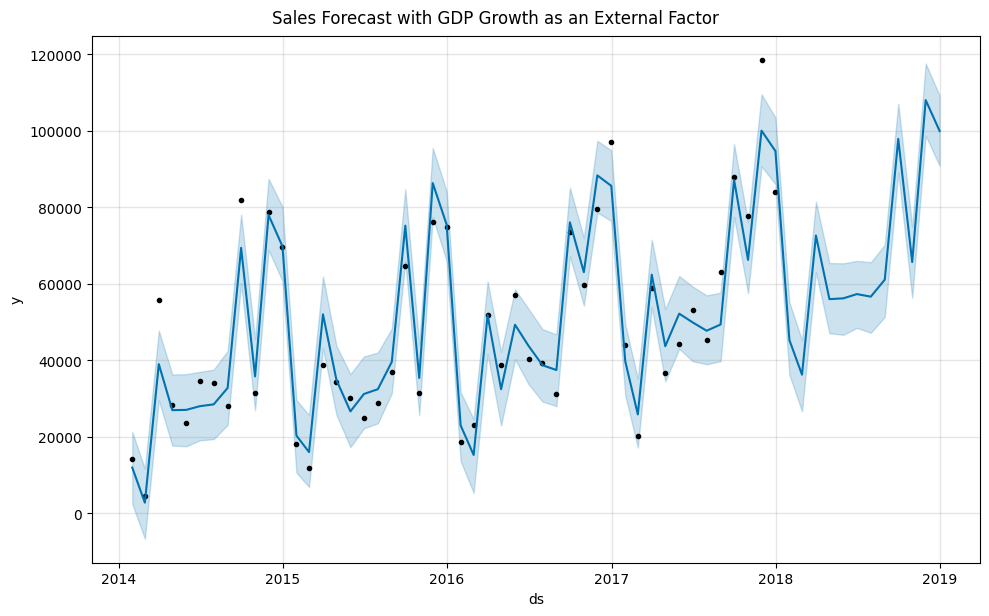

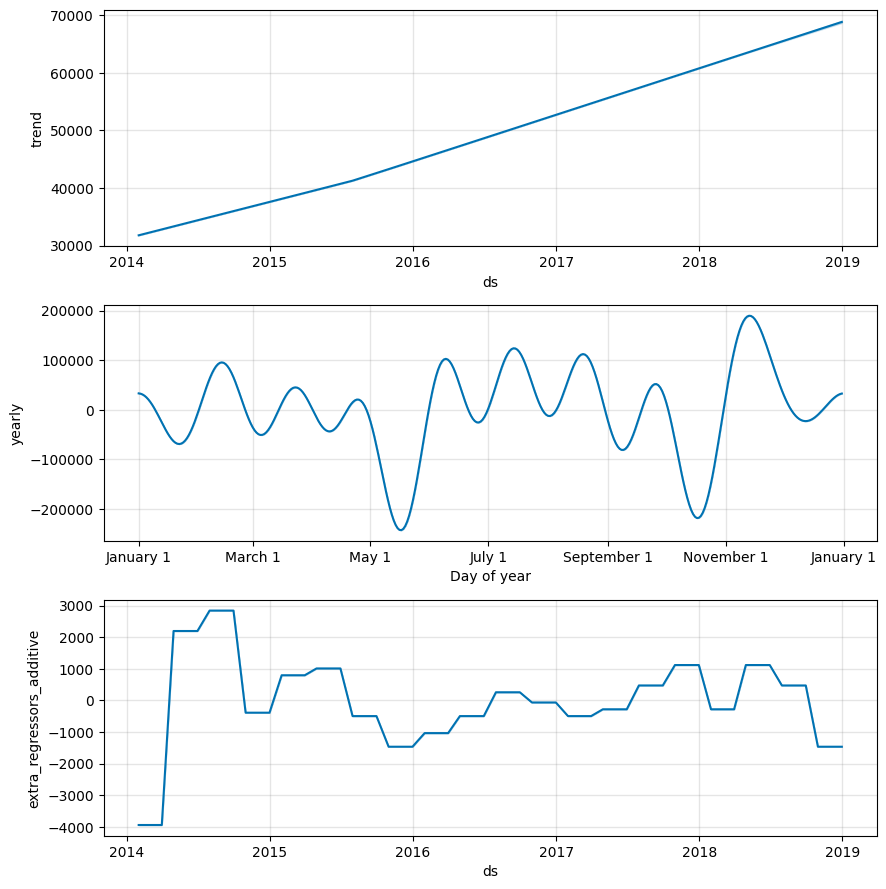

In [75]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum().reset_index()
monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)
# External Data: US Quarterly GDP Growth Rate (%)
# For this project, this data is provided. In a real-world scenario, you would source this from an economic data provider.
gdp_data = {
    'date': pd.to_datetime(['2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
                           '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
                           '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
                           '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
                           '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01']),
    'gdp_growth': [-1.2, 4.5, 5.1, 2.1, 3.2, 3.4, 2.0, 1.1, 1.5, 2.0, 2.7, 2.4, 2.0, 2.2, 2.9, 3.5, 2.2, 3.5, 2.9, 1.1]
}
gdp_df = pd.DataFrame(gdp_data)
gdp_df['ds'] = gdp_df['date']
# using forward-fill merge algorithm  to apply the quarterly GDP data to each month within that quarter.
merged_df = pd.merge_asof(monthly_sales.sort_values('ds'),gdp_df.sort_values('ds'),on='ds',direction='backward')
# Build and Train the Multivariate Prophet Model
# Initialize the model
model_with_gdp = Prophet(yearly_seasonality=True, daily_seasonality=False)
# Add the external regressor
model_with_gdp.add_regressor('gdp_growth')
# Fit the model on the combined data
model_with_gdp.fit(merged_df)
# To forecast we need future values for our regressor. We'll assume a stable growth rate for the next year
future = model_with_gdp.make_future_dataframe(periods=12, freq='M')
#adding the gdp_growth column to our future dataframe --  this is for future analysis too
future_gdp = pd.merge_asof(future.sort_values('ds'),gdp_df.sort_values('ds'),on='ds',direction='backward')
# For dates beyond our known GDP data, we'll assume a stable 2.5% growth
future_gdp['gdp_growth'].fillna(2.5, inplace=True)
forecast_with_gdp = model_with_gdp.predict(future_gdp)
fig = model_with_gdp.plot(forecast_with_gdp)
fig.suptitle("Sales Forecast with GDP Growth as an External Factor", y=1.02)
# Plot the model components, including the new GDP component
fig_components = model_with_gdp.plot_components(forecast_with_gdp)


# Strategic Recommendations Engine

In [76]:
def generate_recommendations(df):
    """
    Analyzes the superstore dataframe to generate a prioritized list of strategic recommendations.
    """
    recommendations = []

    # opportunity : Address Unprofitable Sub-Categories
    subcat_profit = df.groupby('Sub-Category')['Profit'].sum()
    unprofitable_subcats = subcat_profit[subcat_profit < 0]
    for subcat, loss in unprofitable_subcats.items():
        recommendations.append({
            'Opportunity': f"Address Unprofitable Sub-Category: {subcat}",
            'Impact': abs(loss),  # Impact is the total loss that can be saved
            'Effort': 6,  # Medium-High effort: requires investigation, pricing changes, etc.
            'Recommendation': f"The '{subcat}' sub-category lost ${abs(loss):,.2f}. Investigate cost structure, pricing, and discount strategy. Consider discontinuing if profitability cannot be improved."
        })

    #  Opportunity : Expand in Untapped Markets
    customer_per_state = df.groupby('State')['Customer ID'].nunique()
    untapped_states = customer_per_state[customer_per_state < 10]
    avg_sales_per_customer = df['Sales'].sum() / df['Customer ID'].nunique()
    for state, num_customers in untapped_states.items():
        potential_impact = avg_sales_per_customer * 50 # Estimate impact of acquiring 50 new customers
        recommendations.append({
            'Opportunity': f"Expand in Untapped Market: {state}",
            'Impact': potential_impact,
            'Effort': 8,  # High effort: requires marketing campaigns, logistics
            'Recommendation': f"The state of '{state}' has only {num_customers} customers. Launch a targeted digital marketing campaign to increase market penetration and acquire new customers."
        })

    # Opportunity 3: Re-engage High-Value, At-Risk Customers
    # (Using a simplified RFM logic for this engine)
    snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
    rfm = df.groupby('Customer ID').agg({
        'Order Date': lambda date: (snapshot_date - date.max()).days,
        'Sales': 'sum'
    })
    rfm.rename(columns={'Order Date': 'Recency', 'Sales': 'MonetaryValue'}, inplace=True)

    # Defining  'At-Risk': High value (top 25%) but not recent (recency > 180 days)
    at_risk_customers = rfm[(rfm['MonetaryValue'] > rfm['MonetaryValue'].quantile(0.75)) & (rfm['Recency'] > 180)]
    if not at_risk_customers.empty:
        at_risk_impact = at_risk_customers['MonetaryValue'].sum()
        recommendations.append({
            'Opportunity': "Re-engage High-Value, At-Risk Customers",
            'Impact': at_risk_impact,
            'Effort': 3,
            'Recommendation': f"There are {len(at_risk_customers)} high-value customers who have not purchased in over 6 months. Recommendation is to Launch a targeted re-engagement campaign with a special offer to win them back."
        })#giving suggestion for regaining the lost customers
    #  Scoring and Ranking
    rec_df = pd.DataFrame(recommendations)
    rec_df['Impact_Score'] = rec_df['Impact'].rank(pct=True)
    rec_df['Effort_Score'] = rec_df['Effort'].rank(pct=True)
    rec_df['Priority_Score'] = rec_df['Impact_Score'] / rec_df['Effort_Score']
    # Sort by the highest priority
    rec_df.sort_values('Priority_Score', ascending=False, inplace=True)
    return rec_df

top_recommendations = generate_recommendations(df)
for index, row in top_recommendations.head(5).iterrows():
    print(f"\nOPPORTUNITY: {row['Opportunity']}")
    print(f"  - PRIORITY SCORE: {row['Priority_Score']:.2f}")
    print(f"  - RECOMMENDATION: {row['Recommendation']}")



OPPORTUNITY: Re-engage High-Value, At-Risk Customers
  - PRIORITY SCORE: 12.00
  - RECOMMENDATION: There are 33 high-value customers who have not purchased in over 6 months. Recommendation is to Launch a targeted re-engagement campaign with a special offer to win them back.

OPPORTUNITY: Address Unprofitable Sub-Category: Tables
  - PRIORITY SCORE: 1.00
  - RECOMMENDATION: The 'Tables' sub-category lost $17,725.48. Investigate cost structure, pricing, and discount strategy. Consider discontinuing if profitability cannot be improved.

OPPORTUNITY: Expand in Untapped Market: Maine
  - PRIORITY SCORE: 0.88
  - RECOMMENDATION: The state of 'Maine' has only 3 customers. Launch a targeted digital marketing campaign to increase market penetration and acquire new customers.

OPPORTUNITY: Expand in Untapped Market: District of Columbia
  - PRIORITY SCORE: 0.88
  - RECOMMENDATION: The state of 'District of Columbia' has only 4 customers. Launch a targeted digital marketing campaign to increase 